<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/8_stochastic_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic and Batch gradient descent



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## Preprocessing & Scalling

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [5]:
scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [6]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

## Mini Batch Gradien Descent

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_predicted - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.58391186, 0.37901352]), 0.0, 0.008501492548236428)

Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

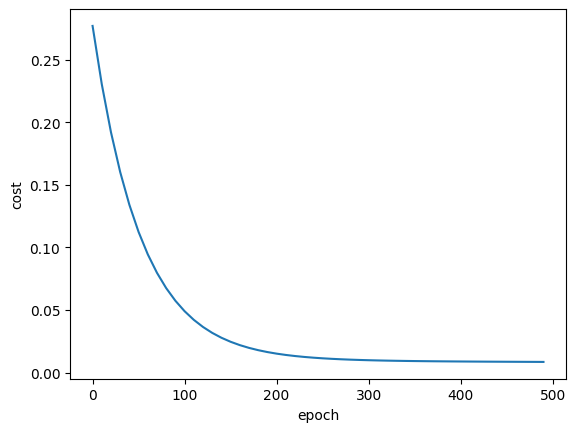

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

some predictions

In [11]:
def predict(area, bedroom, w, b):
    scaled_X = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [12]:
predict(2600, 3, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


106.51119978750113

In [13]:
predict(2000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


77.41023105168861

In [14]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


76.61088554172831

## Stocasting Gradient Descent

In [15]:
import random
random.randint(0, 6)

3

In [19]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70655445, 0.67234834]), -0.23356253077379607, 0.05466072256586962)

In [20]:
w , b

(array([0.8646857 , 0.84000242]), -0.25168898313281357)

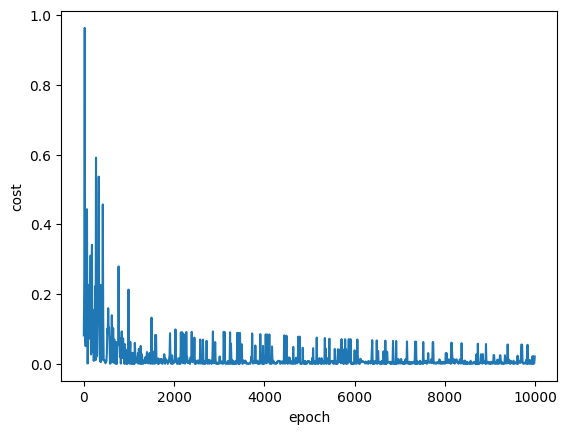

In [21]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [22]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


127.74871780937691

In [23]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


68.87650068580594